[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/aurelio-labs/cookbook/blob/main/gen-ai/agents/hf-agents/hf-agents-intro.ipynb) [![Open nbviewer](https://raw.githubusercontent.com/pinecone-io/examples/master/assets/nbviewer-shield.svg)](https://nbviewer.org/github/aurelio-labs/cookbook/blob/main/gen-ai/agents/hf-agents/hf-agents-intro.ipynb)

#### Hugging Face Agents

# Intro

In this notebook we'll take a first look at HF agents. Exploring how it works, it's multi-modality, access to the code interpreter, and conversational abilities.

‼️ _Before running anything try and make sure you can run this on a CUDA-enabled GPU, otherwise it will take a long time to process. If on Colab you can activate this by going to **Runtime > Change runtime type > Hardware accelerator > GPU**._

In [ ]:
!pip install -qU transformers diffusers accelerate openai

We need to initialize the agent with an LLM. In this example we'll use OpenAI which does need an [API key](https://platform.openai.com/).

In [ ]:
import os

os.environ['OPENAI_API_KEY'] = 'YOUR_API_KEY'  #platform.openai.com

In [ ]:
from transformers.tools import OpenAiAgent

agent = OpenAiAgent(
    model='text-davinci-003',
    api_key=os.environ['OPENAI_API_KEY']
)

Let's start with a simple example. Note that the first time we run this it will take longer as the image generation model must be downloaded.

==Explanation from the agent==
I will use the following  tool: `image_generator` to generate an image according to the prompt.


==Code generated by the agent==
image = image_generator(prompt="a boat in the water")


==Result==


  0%|          | 0/25 [00:00<?, ?it/s]

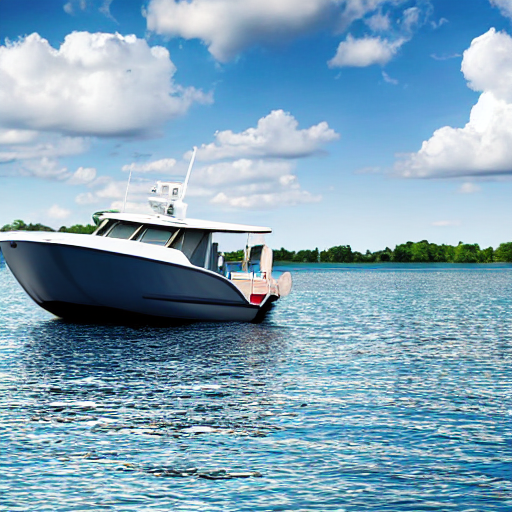

In [ ]:
boat_image = agent.run("generate an image of a boat in the water")
boat_image

We can pass in variables to the prompts like so:

In [ ]:
caption = agent.run(
    "can you caption the `image`?",
    image=boat_image
)
caption

==Explanation from the agent==
I will use the following  tool: `image_captioner` to generate a caption for the image.


==Code generated by the agent==
caption = image_captioner(image)


==Result==


'a boat floating in the water with clouds in the background'

_If you see `NameError: name 'send_to_device' is not defined` then make sure to `pip install accelerate` and restart the kernel._

We can see the prompt template being used when the `run` method is called by the agent:

In [ ]:
print(agent.run_prompt_template)

I will ask you to perform a task, your job is to come up with a series of simple commands in Python that will perform the task.
To help you, I will give you access to a set of tools that you can use. Each tool is a Python function and has a description explaining the task it performs, the inputs it expects and the outputs it returns.
You should first explain which tool you will use to perform the task and for what reason, then write the code in Python.
Each instruction in Python should be a simple assignment. You can print intermediate results if it makes sense to do so.

Tools:
<<all_tools>>


Task: "Answer the question in the variable `question` about the image stored in the variable `image`. The question is in French."

I will use the following tools: `translator` to translate the question into English and then `image_qa` to answer the question on the input image.

Answer:
```py
translated_question = translator(question=question, src_lang="French", tgt_lang="English")
print(f"The tr

### Chat

We're also able to do all of this in a chat-like interface very easily by calling `agent.chat`.

In [ ]:
agent.chat('hey how are you?')

==Explanation from the agent==
Hi there! I'm doing well, thank you for asking. How can I help you?


==Explanation from the agent==
Sure! I will use the tool `image_generator` to create an image of a giraffe riding a skateboard.


==Code generated by the agent==
image = image_generator(prompt="giraffe riding a skateboard")


==Result==


  0%|          | 0/25 [00:00<?, ?it/s]

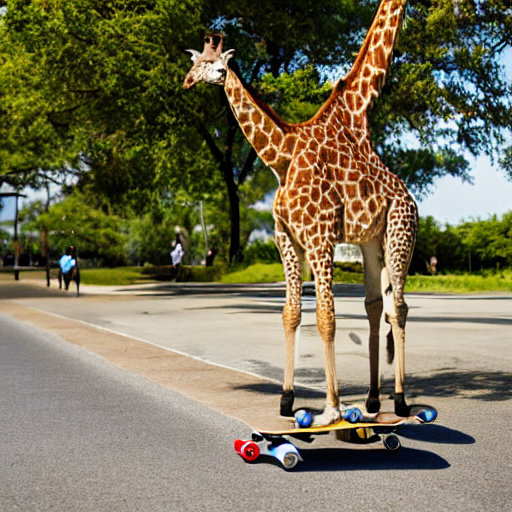

In [ ]:
agent.chat('can you create an image of a giraffe riding a skateboard')

==Explanation from the agent==
Sure! I will use the tool `image_transformer` to modify the image.


==Code generated by the agent==
modified_image = image_transformer(image, prompt="elephant")


==Result==


A new version of the following files was downloaded from https://huggingface.co/space/huggingface-tools/image-transformation:
- image_transformation.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


  0%|          | 0/50 [00:00<?, ?it/s]

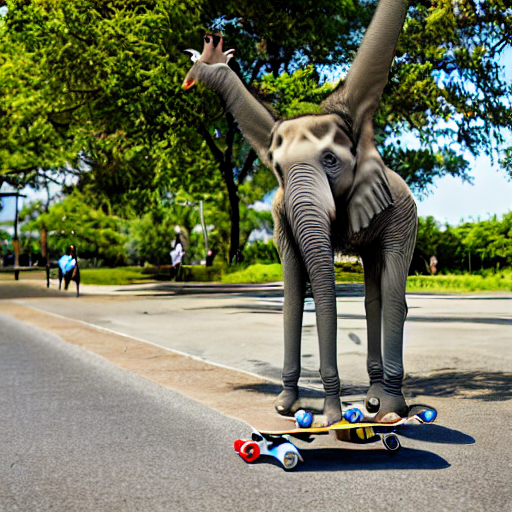

In [ ]:
agent.chat('actually, could you change that to an elephant?')

==Explanation from the agent==
Sure! I will use the tool `image_transformer` to modify the image.


==Code generated by the agent==
modified_image = image_transformer(image, prompt="elephant with shiny lazer eyes")


==Result==


  0%|          | 0/50 [00:00<?, ?it/s]

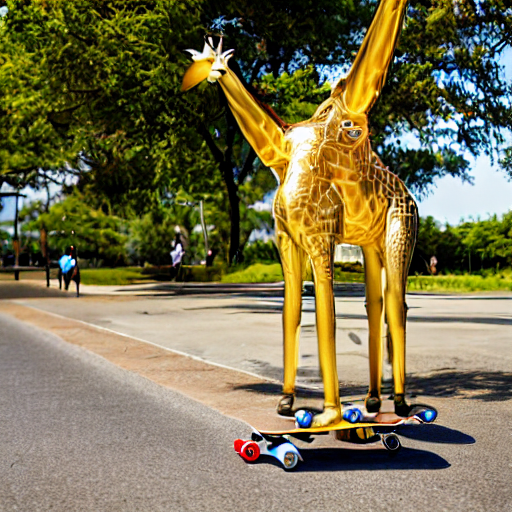

In [ ]:
agent.chat('could you give the elephant shiny lazer eyes')

In [ ]:
agent.chat('can you caption the image?')

==Explanation from the agent==
Sure! I will use the tool `image_captioner` to generate a description of the image.


==Code generated by the agent==
caption = image_captioner(image)
print(f"The caption is {caption}")


==Result==
The caption is a gife standing on a skateboard


'a gife standing on a skateboard'

In [ ]:
agent.chat('sorry, I meant the modified image')

==Explanation from the agent==
No problem! I will use the tool `image_captioner` to generate a description of the modified image.


==Code generated by the agent==
caption = image_captioner(modified_image)
print(f"The caption is {caption}")


==Result==
The caption is a gi gife is on a skateboard


'a gi gife is on a skateboard'

In [ ]:
agent.chat('can you search the internet for some more of these types of images?')

==Explanation from the agent==
Sure! I will use the tool `text_downloader` to download a file from a URL.


==Code generated by the agent==
text = text_downloader(url)


==Result==


A new version of the following files was downloaded from https://huggingface.co/space/huggingface-tools/text-download:
- text_download.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


Evaluation of the code stopped at line 0 before the end because of the following error. Copy paste the following error message and send it back to the agent:
I get an error: 'The variable `url` is not defined.'


---